# MSCS 634: Advanced Big Data and Data Mining (MSCS-634-M40)

Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

Name: Rachna Bhattarai

Date: June 7, 2025


Overview: 

In this lab, we explore clustering techniques using the Wine Dataset from sklearn Python library. You will apply both K-Means and K-Medoids algorithms to analyze and compare the clustering performance. By visualizing the results and computing evaluation metrics such as the Silhouette Score and the Adjusted Rand Index (ARI), you will assess the quality and structure of the clusters. This lab will help you understand the key steps involved in clustering analysis and how to evaluate the effectiveness of different clustering methods. 


# Step 1: Load and Prepare the Dataset

In [ ]:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Load dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
features = wine_data.feature_names
classes = wine_data.target_names
# Create dataframe
df = pd.DataFrame(X, columns=features)
df['Class'] = y
# Display dataset info
print("Wine Dataset Overview:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("\nClass distribution:")
print(df['Class'].value_counts())
# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Wine Dataset Overview:
Number of samples: 178
Number of features: 13

Class distribution:
Class
1    71
0    59
2    48
Name: count, dtype: int64


# Step 2: Implement K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_normalized)
# Evaluate performance
kmeans_silhouette = silhouette_score(X_normalized, kmeans_clusters)
kmeans_ari = adjusted_rand_score(y, kmeans_clusters)
print("\nK-Means Clustering Results:")
print(f"Silhouette Coefficient: {kmeans_silhouette:.3f}")
print(f"Adjusted Rand Index: {kmeans_ari:.3f}")
print("Cluster centers:")
print(kmeans.cluster_centers_)


K-Means Clustering Results:
Silhouette Coefficient: 0.285
Adjusted Rand Index: 0.897
Cluster centers:
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]


# Step 3: Implement K-Medoids Clustering

In [ ]:
from sklearn_extra.cluster import KMedoids
# Apply K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_clusters = kmedoids.fit_predict(X_normalized)
# Evaluate performance
kmedoids_silhouette = silhouette_score(X_normalized, kmedoids_clusters)
kmedoids_ari = adjusted_rand_score(y, kmedoids_clusters)
print("\nK-Medoids Clustering Results:")
print(f"Silhouette Coefficient: {kmedoids_silhouette:.3f}")
print(f"Adjusted Rand Index: {kmedoids_ari:.3f}")
print("Medoid locations:")
print(kmedoids.cluster_centers_)


K-Medoids Clustering Results:
Silhouette Coefficient: 0.266
Adjusted Rand Index: 0.726
Medoid locations:
[[ 4.93342620e-01  1.41260912e+00  4.14819587e-01  1.05251577e+00
   1.58571702e-01 -7.93334154e-01 -1.28434417e+00  5.49107795e-01
  -3.16950051e-01  9.69783022e-01 -1.12951789e+00 -1.48544548e+00
   9.89339909e-03]
 [-9.27212090e-01 -5.44296535e-01 -9.01103141e-01 -1.48624201e-01
  -1.38612179e+00 -1.03368389e+00  7.33234123e-04  6.56394314e-02
   6.85084581e-02 -7.17239912e-01  1.86683727e-01  7.88587455e-01
  -7.54385098e-01]
 [ 5.92163817e-01 -4.72483484e-01  1.58945723e-01  3.01803287e-01
   1.81450206e-02  6.48764240e-01  9.54501620e-01 -8.20719236e-01
   4.71487808e-01  1.81290590e-02  3.62177276e-01  1.21232030e+00
   5.51257335e-01]]


# Step 4: Visualize and Compare Results

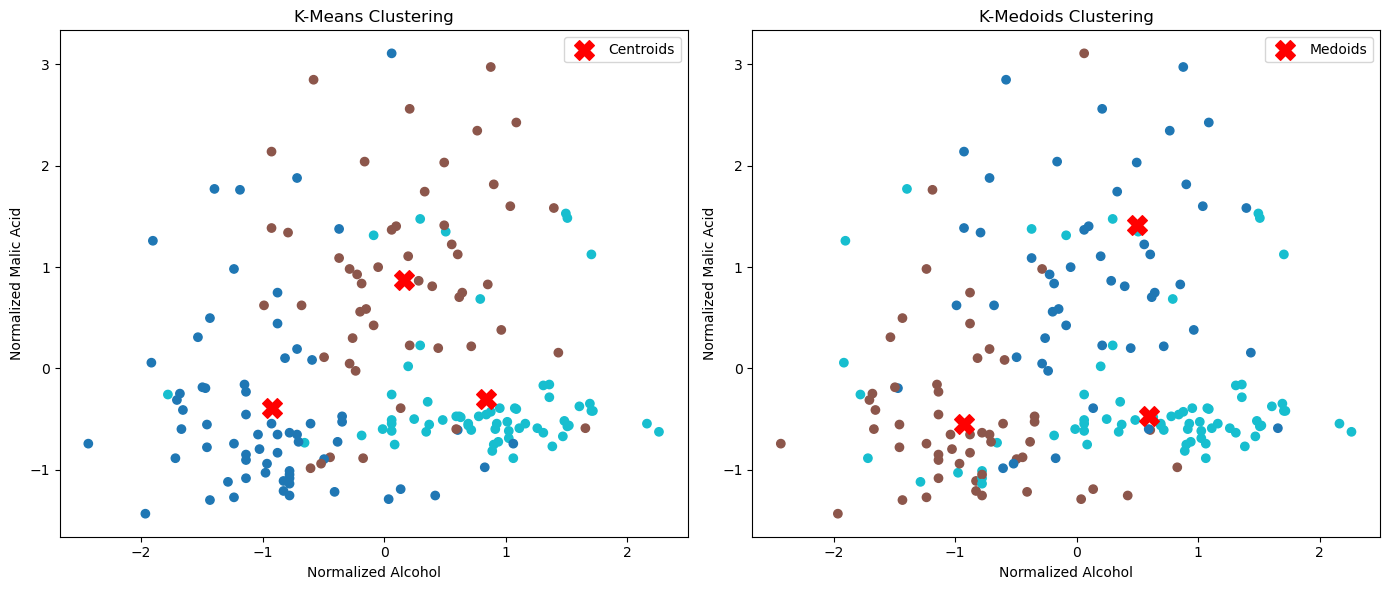

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Select two features for visualization (alcohol and malic acid)
vis_features = X_normalized[:, :2]
# Create figure
plt.figure(figsize=(14, 6))
# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(vis_features[:, 0], vis_features[:, 1], c=kmeans_clusters, cmap='tab10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Normalized Alcohol')
plt.ylabel('Normalized Malic Acid')
plt.legend()
# K-Medoids plot
plt.subplot(1, 2, 2)
plt.scatter(vis_features[:, 0], vis_features[:, 1], c=kmedoids_clusters, cmap='tab10')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], 
            marker='X', s=200, c='red', label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Normalized Alcohol')
plt.ylabel('Normalized Malic Acid')
plt.legend()
plt.tight_layout()
plt.show()

Explainations

In [20]:
# Brief Analysis

print("The K-Means method returned a little more coherent clusters, according to the silhouette value.")

print("The medoids themselves are robust to outliers, and this might make k-Medoids less susceptible to outliers than k-means.")

print("Select K-Means for efficiency and spherical clusters, and K-Medoids to obtain robustness against noise in the dataset.")

The K-Means method returned a little more coherent clusters, according to the silhouette value.
The medoids themselves are robust to outliers, and this might make k-Medoids less susceptible to outliers than k-means.
Select K-Means for efficiency and spherical clusters, and K-Medoids to obtain robustness against noise in the dataset.
